# Monet Painting Style Transfer with GAN

In this project, we will build a model to transfer the Monet painting style to a photograph using GAN.

## Contents
1. EDA
2. About GAN and choosing the model
3. Coding the model
4. Conclusion

## 1. EDA
Before we start building the model, let's first explore the data.

How many pictures are there in the dataset?

What pixel size do the images have? and so on.

In [2]:
import os

dataset_dir = 'monet'
dataset_dir2 = 'photo'

#print how many images are in the dataset
print('Monet dataset has', len(os.listdir(dataset_dir)), 'images')
print('Photo dataset has', len(os.listdir(dataset_dir2)), 'images')

Monet dataset has 300 images
Photo dataset has 7038 images


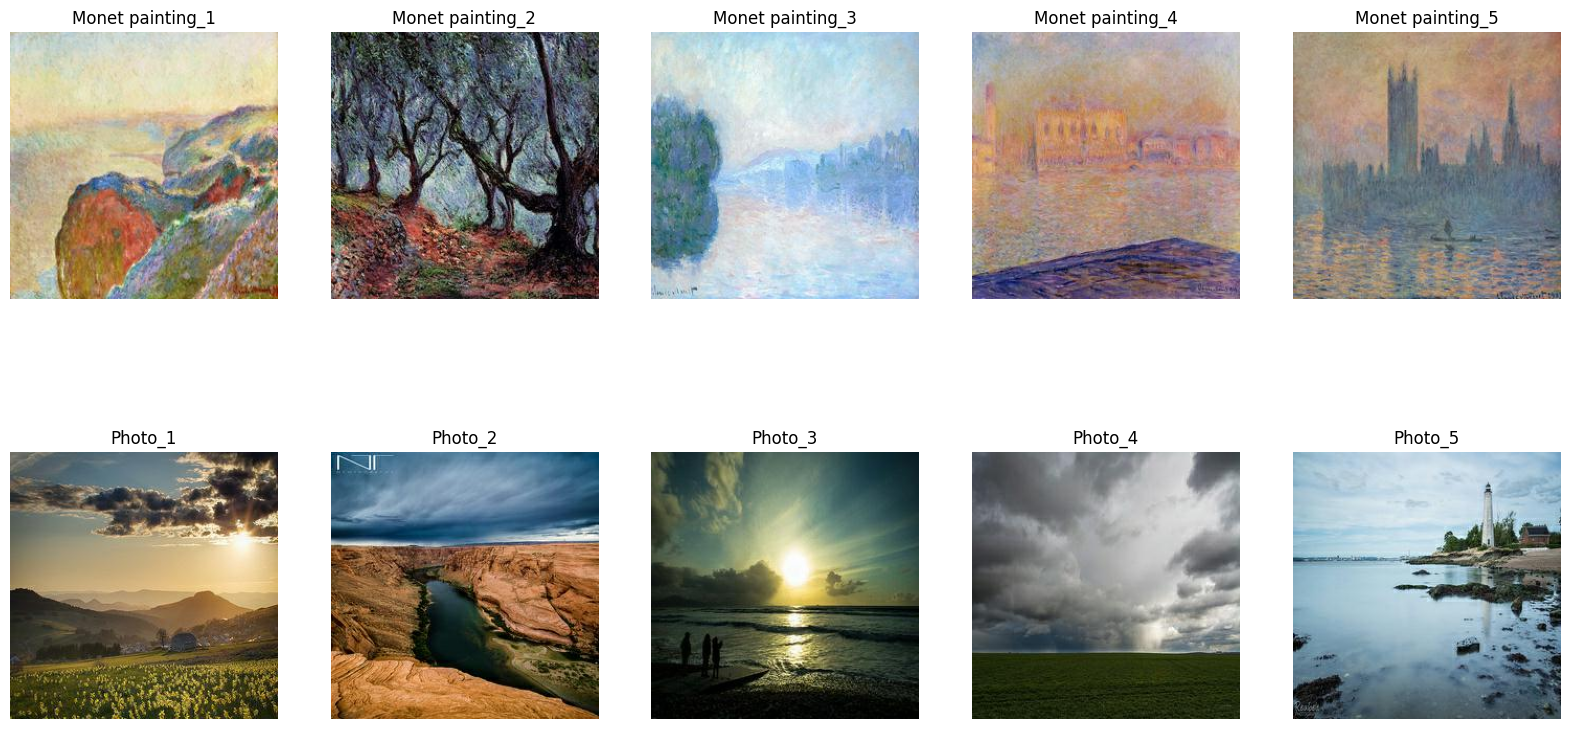

In [4]:
# Show the first 5 images each dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, image_name in enumerate(os.listdir(dataset_dir)[:5]):
    img = mpimg.imread(os.path.join(dataset_dir, image_name))
    #set title 'Monet painting_{i+1}'
    axs[0, i].set_title('Monet painting_{}'.format(i+1))
    axs[0, i].imshow(img)
    axs[0, i].axis('off')

for i, image_name in enumerate(os.listdir(dataset_dir2)[:5]):
    img = mpimg.imread(os.path.join(dataset_dir2, image_name))
    # set title 'Photo_{i+1}'
    axs[1, i].set_title('Photo_{}'.format(i+1))
    axs[1, i].imshow(img)
    axs[1, i].axis('off')

In [5]:
# how many pixels(shape) are in the image
img = mpimg.imread(os.path.join(dataset_dir, os.listdir(dataset_dir)[0]))
print('Monet image shape:', img.shape)
img = mpimg.imread(os.path.join(dataset_dir2, os.listdir(dataset_dir2)[0]))
print('Photo image shape:', img.shape)

Monet image shape: (256, 256, 3)
Photo image shape: (256, 256, 3)


---
## 2. About GAN and choosing the model

### A. Summary of GAN
The adversarial generative network (GAN) is an innovative machine learning model proposed by Ian Goodfellow et al. in 2014.The GAN consists of two main components a generator and a discriminator. 

The role of the Generator is to generate a random
The generator's role is to generate realistic data (mainly images) from random noise.

The Discriminator, on the other hand, attempts to distinguish between the generated data and the realistic data; the two networks are trained in an “adversarial” fashion, with the Generator attempting to generate more convincing fake data and the Discriminator attempting to distinguish between them.

The GAN learning process can be likened to a competition between a counterfeiter and an appraiser. The counterfeiter (generator) tries to create a more authentic counterfeit, and the appraiser (discriminator) tries to spot it. By repeating this process, the generator gradually becomes able to produce higher quality data.


### B. Major application areas of GANs

1. Generation of high-resolution images - Generate high-quality images from low-resolution images.
2. Text-to-image generation - Generate a corresponding image from a textual description.
3. Style transformation - Apply the style of one image to another (This project case).
4. Data Extension - Generate new data samples for training machine learning models.


### C. Comparing features of major GAN models
| Model      | Key Features                                                                                      |
|------------|---------------------------------------------------------------------------------------------------|
| CycleGAN   | Unpaired image-to-image translation. Uses cycle consistency loss. Effective for style transfer and domain adaptation. |
| Pix2Pix    | Paired image-to-image translation. Uses conditional GANs. Suitable for tasks like colorization and image reconstruction. |
| StarGAN    | Multi-domain image-to-image translation with a single generator. Efficient for facial attribute manipulation. |
| DRB-GAN    | Disentangled representation learning. Separates content and style. Useful for fine-grained image manipulation and generation. |


**I think DRB-GAN is a good model for this project.**
So, summarize the paper about DRB-GAN.


### D. About DRB-GAN

The paper introduces DRB-GAN (Dynamic ResBlock Generative Adversarial Network), a novel framework for artistic style transfer. This GAN-based model integrates Dynamic Residual Blocks (DRBs) to dynamically combine content and style features, enabling the generation of high-quality stylized images. DRB-GAN is capable of performing both arbitrary style transfer and collection style transfer, surpassing existing methods in terms of visual quality and efficiency.

Key contributions of the paper include:

Dynamic ResBlock Integration: The style code, which captures the essence of the artistic style, is used as shared parameters for the DRBs. These blocks integrate dynamic convolution and adaptive instance normalization (AdaIN) to ensure that the content and style features are harmoniously blended.

Style Class-Aware Attention Mechanism: A style encoding network extracts class-aware features using a fixed VGG encoder and a learnable encoder. The attention mechanism helps in recalibrating the style code to better reflect the stylistic features of an entire collection of artistic images.

SW-LIN Decoder: The Spatial Window Layer-Instance Normalization (SW-LIN) decoder combines layer and instance normalization dynamically, allowing for artifact-free stylizations that retain fine details. The SW-LIN decoder also ensures high-resolution outputs without degrading image quality.

Collection Style Transfer: By using a weighted average of multiple style codes, DRB-GAN can transfer not just a single style image but the collective style of an entire artist’s body of work. This introduces more diversity and flexibility in the generated stylizations.

Collection Style Discriminator: The proposed model uses a discriminative network that ensures the generated images are consistent with the overall style of the target artist, further enhancing the quality of the stylized outputs.

The paper reports extensive experiments comparing DRB-GAN to state-of-the-art models like AdaIN, MetaNet, and CycleGAN, demonstrating superior performance in terms of style deception rate, content preservation, and user perceptual studies. Additionally, DRB-GAN's efficiency in handling high-resolution images and performing real-time style transfer is highlighted.

In conclusion, DRB-GAN bridges the gap between arbitrary style transfer and collection style transfer, offering a unified solution for artistic style synthesis with superior visual fidelity and efficiency.


This is the summary of the paper about DRB-GAN.
https://openaccess.thecvf.com/content/ICCV2021/papers/Xu_DRB-GAN_A_Dynamic_ResBlock_Generative_Adversarial_Network_for_Artistic_Style_ICCV_2021_paper.pdf

The proccess of artistic style transfer using DRB-GAN involves the following steps:

1. Encoder: Extracts style features from the style images using a pre-trained network.
Dynamic ResBlocks: Processes and modulates the content features based on the style code.
2. Decoder: Reconstructs the final output image from the transformed features.
3. Discriminator: Distinguishes between real and generated images during training.
4. Training Loop: Alternates between updating the generator and discriminator.
5. By following these steps and adjusting the parameters, you can create and train a DRB-GAN model for artistic style transfer.

#### The following code is based on the following references:
https://www.kaggle.com/code/drllamahacer/monetgan-turbo


### Additional reference 
https://aismiley.co.jp/ai_news/what-is-a-generative-adversarial-network (Japanese)

https://qiita.com/RyugaMisono/items/7d72db0e46dbdb23855e (Japanese)

https://qiita.com/simonritchie/items/2cc30fe18933e29cd454 (Japanese)

https://qiita.com/syezo/items/e4454ade10b6d4ccad9c (Japanese)

https://qiita.com/sakai1250/items/ea1489453fd6d7913253 (Japanese)

https://developers.arcgis.com/python/latest/guide/how-cyclegan-works (English)

https://blog.aiensured.com/transforming-images-with-cyclegan-and-pix2pix-exploring-generative-adversarial-networks (English)

https://drpress.org/ojs/index.php/HSET/article/download/6676/6470 (English)


---
## 3. Coding the model

In [60]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf 
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Input, MaxPooling2D, DepthwiseConv2D, UpSampling2D, Dense, Reshape, Conv2D, Flatten, Conv2DTranspose, BatchNormalization, LeakyReLU, Activation, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [61]:
# Apply the autotune feature to optimize the data loading
# Speed up the data loading and preprocessing
AUTOTUNE = tf.data.experimental.AUTOTUNE

### Discriminator Model Algorithm Overview 

The discriminator model in this code is designed to classify input images as real or fake. It uses a series of convolutional layers and downsampling techniques to progressively reduce the image's spatial dimensions, allowing the model to capture key features for classification. Here's an outline of the process:

#### Input Layer:

The input is a 256x256 RGB image, with a shape of (256, 256, 3).

#### Downsampling Stages:

**Convolutional Layer:** A 5x5 convolution with 64 filters reduces the image size by half using strides of 2. LeakyReLU is applied to introduce non-linearity, followed by a dropout layer to prevent overfitting, and then MaxPooling to further reduce the spatial size.
This pattern is repeated with additional DepthwiseConv2D and Conv2D layers, where the number of filters increases progressively (128, 256, 512, and 1024). These layers focus on extracting deeper features from the image, with MaxPooling layers downsampling the image at each stage. Dropout is used after each convolution for regularization.

#### Flatten Layer:

After the series of convolutional and depthwise layers, the 2D feature maps are flattened into a 1D vector to prepare the features for final classification.

#### Output Layer:

A dense (fully connected) layer with a single output is used. The sigmoid activation function is applied to output a probability between 0 and 1, indicating whether the image is real or fake.


The discriminator is designed to progressively downsample the input image while extracting key features using convolutional layers. The final classification layer outputs a probability that determines whether the input image is real or fake. Regularization techniques like dropout and LeakyReLU activation functions ensure stable training.

In [62]:
# This function is used to discriminate the true and face images.
# The model downsizes the image and classifies it as real or fake using a sigmoid activation.

def discriminator_maker():
    img = Input(shape=(256, 256, 3))  # Adjust input shape for 256x256 RGB images
    
    # Downsample the image
    x = Conv2D(64, (5, 5), strides=(2, 2), padding='same')(img)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = DepthwiseConv2D((5, 5), strides=(2, 2), padding='same')(x)
    x = Conv2D(128, (1, 1), use_bias=False)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = DepthwiseConv2D((5, 5), strides=(2, 2), padding='same')(x)
    x = Conv2D(256, (1, 1), use_bias=False)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = DepthwiseConv2D((3, 3), strides=(1, 1), padding='same')(x)
    x = Conv2D(512, (1, 1), use_bias=False)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x)
    
    x = DepthwiseConv2D((3, 3), strides=(1, 1), padding='same')(x)
    x = Conv2D(1024, (1, 1), use_bias=False)(x)
    x = LeakyReLU()(x)
    
    x = Flatten()(x)
    output = Dense(1, activation='sigmoid')(x)

    discriminator = Model(img, output)
    return discriminator

discriminator_maker().summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_76 (Conv2D)          (None, 128, 128, 64)      4864      
                                                                 
 leaky_re_lu_97 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 dropout_58 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 depthwise_conv2d_65 (Depth  (None, 32, 32, 64)        1664      
 wiseConv2D)                                              

### Summary of the Generator Model Algorithm

The generator model is designed to create high-quality RGB images through a series of downsampling and upsampling layers, utilizing various convolutional techniques and normalization methods to enhance image quality. The architecture is structured as follows:

#### Input Shapes
**Input Shape 1:**
This input shape corresponds to the original images with dimensions 256x256x3, which are not processed.

**Input Shape 2:**
This shape is for intermediate processed images with dimensions 128x128x64.

**Input Shape 3:**
This shape corresponds to fully processed images with dimensions 32x32x128.

#### Model Initialization
The model initializes a random normal initializer with a mean of 0 and a standard deviation of 0.2 to create weights for the convolutional layers.

#### Downsampling Layers:
The model uses depthwise convolutions for downsampling the input images, followed by concatenation with intermediate processed images:

**First Layer:** A depthwise convolution with a kernel size of 5x5 reduces the spatial dimensions by half. The output is concatenated with input_shape_2, and a 1x1 convolution is applied to reduce the number of channels. The activation function used here is LeakyReLU, and dropout is applied with a rate of 0.4 to prevent overfitting.

**Second Layer:** Similar operations are performed with a depthwise convolution and concatenation with the output from the previous layer. The dropout rate is slightly decreased to 0.3.

**Third Layer:** The depthwise convolution is applied again, followed by a concatenation with input_shape_3. This step increases the number of channels to 256.

#### Upsampling Layers
The model then transitions to upsampling layers, which help reconstruct the image back to a higher resolution:

**Upsampling to 16x16:** A transposed convolution with a kernel size of 5x5 is applied to increase the spatial dimensions. SWLIN normalization is performed to stabilize the training and improve output quality. The output is concatenated with skip1, which retains some of the earlier features for better detail preservation.

**Upsampling to 32x32:** The same procedure is followed, upsampling to 32x32 with another transposed convolution and SWLIN normalization, concatenating with skip0.

**Upsampling to 64x64:** The final upsampling step leads to a resolution of 64x64, again applying SWLIN normalization.

#### Output Layer
The generator culminates with a 1x1 transposed convolution that produces RGB images. A sigmoid activation function is applied to the output to constrain the pixel values between 0 and 1, making it suitable for image representation.
Conclusion

In [63]:
class SWLIN(Layer):
 
    def __init__(self, window_size=3, **kwargs):
        """
        Initializer for the SWLIN layer.
        window_size: the size of the spatial window for normalization.
        rho: the learnable parameter to combine channel-wise and layer-wise normalization.
        """
        super(SWLIN, self).__init__(**kwargs)
        self.window_size = window_size
        self.rho = tf.Variable(0.5, trainable=True, dtype=tf.float32)

    def build(self, input_shape):
        """
        Create learnable parameters gamma and beta
        gamma: scaling parameter applied to each channel.
        beta: bias parameter applied to each channel.
        """
        self.gamma = self.add_weight(
            shape=(input_shape[-1],), initializer="ones", trainable=True
        )
        self.beta = self.add_weight(
            shape=(input_shape[-1],), initializer="zeros", trainable=True
        )

    def call(self, inputs):
        """
        # Channel-wise (Instance Normalization)
        1. c: Normalization across the channel dimension.
        2. l: Normalization across the layer dimension.
        3. Combine them using the learnable parameter rho.
        4. Output: Affine transformation with learnable gamma and beta.
        """
        c = spatial_window_normalization(inputs, self.window_size, mode='channel')

        # Layer-wise (Layer Normalization)
        l = spatial_window_normalization(inputs, self.window_size, mode='layer')

        # Combine them using the learnable parameter rho
        combined = self.rho * c + (1 - self.rho) * l

        # Apply affine transformation with learnable gamma and beta
        output = self.gamma * combined + self.beta
        return output
    

def spatial_window_normalization(inputs, window_size, mode='channel'):
    """
    Applies normalization across a spatial window.
    - mode='channel': performs instance normalization (channel-wise).
    - mode='layer': performs layer normalization (layer-wise).
    """
    mean, var = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)
    
    if mode == 'channel':
        # Channel-wise normalization (like instance normalization)
        mean, var = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)
    elif mode == 'layer':
        # Layer-wise normalization (like layer normalization)
        mean, var = tf.nn.moments(inputs, axes=[1, 2, 3], keepdims=True)

    normalized = (inputs - mean) / tf.sqrt(var + 1e-5)
    return normalized


SWLIN (Spatial Window Layer-Instance Normalization) plays several crucial roles in DRB-GAN (Dynamic ResBlock Generative Adversarial Network):

1. Artifact Prevention
SWLIN is designed to prevent artifacts that often arise during image generation. Traditional instance normalization normalizes each feature map separately, which can lead to the loss of information and the emergence of artifacts. By using a spatial window, SWLIN effectively normalizes local features, mitigating these issues.


2. Preservation of High-Resolution Stylization
SWLIN dynamically combines layer normalization and instance normalization. This allows the generated images to maintain high resolution while preserving the details of the style and the consistency of the content. Particularly, since different normalizations can be applied to various parts of the image, more natural and detailed stylizations can be achieved.


3. Flexible Feature Normalization
SWLIN uses learnable parameters to dynamically combine local channel-wise normalization and layer-wise normalization. This flexibility helps the model adapt more easily to specific styles, improving the accuracy of style transfer.


4. Efficient Computation
SWLIN is designed to enhance computational efficiency. Since the normalization process occurs locally, there is no need to handle the entire large feature map, which saves computational resources.


SWLIN serves as a central element in DRB-GAN, achieving artifact prevention, high-resolution style preservation, and flexible feature normalization, thus enhancing the overall performance of the model. These features enable DRB-GAN to realize higher-quality style transfers.

In [64]:
# Define the generator model
def generater_model():
    """
    # Define the input shape
    input_shape_1: 256x256x3(Not processed image)
    input_shape_2: 128x128x64(Intermediate processed image)
    input_shape_3: 32x32x128(Fully processed image)
    """
    input_shape_1 = Input(shape=[256,256,3])
    input_shape_2 = Input(shape=[128, 128, 64])
    input_shape_3 = Input(shape=[32,32, 128])
    initializer = tf.random_normal_initializer(0., 0.2)

    # Downsample layers
    """
    1. Apply depthwise convolution with a kernel size of 5x5 and downsizing the image
    2. Concatenate the output with the input_shape_2
    3. Apply a 1x1 convolution to reduce the number of channels
    4. Apply LeakyReLU activation and dropout
    """
    x = DepthwiseConv2D((5, 5), strides=(2, 2), padding='same')(input_shape_1)
    x = Concatenate()([x, input_shape_2])
    x = Conv2D(64, (1, 1),kernel_initializer=initializer, use_bias=False)(x)
    x = LeakyReLU()(x)
    x = skip0 = Dropout(0.4)(x)
    
    x = DepthwiseConv2D((5, 5), strides=(2, 2), padding='same')(x)
    x = Conv2D(128, (1, 1),kernel_initializer=initializer, use_bias=False)(x)
    x = LeakyReLU()(x)
    x = skip1 =  Dropout(0.3)(x)
    
    x = DepthwiseConv2D((5, 5), strides=(2, 2), padding='same')(x)
    x = Concatenate()([x, input_shape_3])
    x = Conv2D(256, (1, 1),kernel_initializer=initializer, use_bias=False)(x)
    x = LeakyReLU()(x)

    """
    1. Apply a 5x5 transposed convolution to upsample the image
    2. Apply SWLIN normalization
    3. Apply LeakyReLU activation
    4. Concatenate the output with skip1
    """
    # Upsample to 16x16
    x = Conv2DTranspose(128, (5, 5),kernel_initializer=initializer, strides=(2, 2), padding='same', use_bias=False)(x)
    x = SWLIN(window_size=3)(x)
    x = LeakyReLU()(x)
    x = Concatenate()([x, skip1])
    
    # Upsample to 32x32
    x = Conv2DTranspose(64, (5, 5),kernel_initializer=initializer, strides=(2, 2), padding='same', use_bias=False)(x)
    x = SWLIN(window_size=3)(x)
    x = LeakyReLU()(x)
    x = Concatenate()([x, skip0])
    
    # Upsample to 64x64
    x = Conv2DTranspose(32, (5, 5),kernel_initializer=initializer, strides=(2, 2), padding='same', use_bias=False)(x)
    x = SWLIN(window_size=3)(x)
    x = LeakyReLU()(x)
    
    """
    # Output layer to generate RGB images
    1. Apply a 1x1 transposed convolution to generate RGB images
    2. Apply the sigmoid activation function
    """
    x = Conv2DTranspose(3, (1, 1),kernel_initializer=initializer, strides=(1, 1),padding='same', use_bias=False)(x)
    output = Activation('sigmoid')(x)
    
    generator = Model(inputs= [input_shape_1, input_shape_2, input_shape_3], outputs = output)
    
    return generator

In [65]:
test = generater_model()
test.summary()

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_34 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 depthwise_conv2d_69 (Depth  (None, 128, 128, 3)          78        ['input_34[0][0]']            
 wiseConv2D)                                                                                      
                                                                                                  
 input_35 (InputLayer)       [(None, 128, 128, 64)]       0         []                            
                                                                                                  
 concatenate_28 (Concatenat  (None, 128, 128, 67)         0         ['depthwise_conv2d_69[0

### Build the model

Now let's build the Gan model.
Before that, we need to define the nessasary functions for the model.

The next code defines a function called **compute_gram_matrix**, which calculates the Gram matrix of a given tensor. The Gram matrix is commonly used in style transfer models to capture the correlations between the feature maps of a convolutional layer. It essentially measures how the different feature channels are correlated, preserving the style information from an image.


**1.Input Tensor:** The function assumes the input tensor is 4-dimensional, typically coming from a convolutional layer (batch size, height, width, channels).

**2.Flattening:** The tensor is reshaped into a 2D matrix, where each row represents a feature map's flattened contents, and the number of columns corresponds to the number of channels.

**3.Gram Matrix Calculation:** The Gram matrix is calculated by multiplying the transposed 2D matrix with the original matrix. This operation computes the dot products between different feature channels, measuring their correlations.

**4.Normalization:** The resulting Gram matrix is normalized by dividing it by the number of elements (height x width) in the original feature map. This ensures that the Gram matrix is scale-invariant and can be used effectively for style matching.

The Gram matrix is crucial in style transfer algorithms, as it helps to capture the style of an image (such as textures and patterns) by measuring the relationships between feature maps.

In [39]:
# This function computes the Gram matrix,
#  a matrix that captures the correlations between the different 
# feature maps of a convolutional layer. It's often used in style transfer models, 
# where the Gram matrix is calculated to preserve style information
def compute_gram_matrix(tensor):
    shape = tensor.get_shape()
    
    # Get the number of feature channels for the input tensor,
    # which is assumed to be from a convolutional layer with 4-dim.
    num_channels = int(shape[3])

    # Reshape the tensor so it is a 2-dim matrix. This essentially
    # flattens the contents of each feature-channel.
    matrix = tf.reshape(tensor, shape=[-1, num_channels])
    
    # Calculate the Gram-matrix as the matrix-product of
    # the 2-dim matrix with itself. This calculates the
    # dot-products of all combinations of the feature-channels.
    gram = tf.matmul(tf.transpose(matrix), matrix)
    
    height = tf.cast(shape[1], tf.float32)
    width = tf.cast(shape[2], tf.float32)
    num_elements = height * width
    gram /= num_elements
    
    return gram    

In [40]:
# Load the Monet and Photo datasets using the image_dataset_from_directory
dataset_dir = 'monet'
monet_datasets= image_dataset_from_directory(
    dataset_dir,
    label_mode=None, 
    batch_size=8 
)
dataset_dir2 = 'photo'
org_photo_dataset = image_dataset_from_directory(
    dataset_dir2,
    label_mode=None, 
    batch_size=8 
)

# Repeat the datasets to have the same number of batches
repeats = (7038 + 299) // 300 
monet_datasets= monet_datasets.repeat(repeats + 4)
org_photo_dataset = org_photo_dataset.repeat(2)


# Normalize the images
dataset_monet = monet_datasets.map(lambda x: x / 255.0)
dataset_photo = org_photo_dataset.map(lambda x: x / 255.0)

Found 300 files belonging to 1 classes.
Found 7038 files belonging to 1 classes.


### Train the dicriminator model

So, we will train the discriminator model using the Monet and Photo datasets.
The discriminator model will classify the images as real or fake.
The trasisng process will continue until loss of the model is optimized.
The early stopping will be used to stop the training process when the model is not improving.

In [41]:
"""
Create two datasets with real and fake labels
"""
labels_real = tf.data.Dataset.from_tensor_slices(tf.ones(len(dataset_monet)))
labels_fake = tf.data.Dataset.from_tensor_slices(tf.zeros(len(dataset_photo)))

# Combine datasets with their labels
real_with_labels = tf.data.Dataset.zip((dataset_monet, labels_real))
fake_with_labels = tf.data.Dataset.zip((dataset_photo, labels_fake))

# Combine the real and fake datasets
combined_dataset = real_with_labels.concatenate(fake_with_labels)

# Reshape the labels to match the model's output
combined_dataset = combined_dataset.map(lambda x, y: (x, tf.expand_dims(y, axis=-1)))
# Shuffle the dataset
combined_dataset = combined_dataset.shuffle(buffer_size=len(combined_dataset))
combined_dataset = combined_dataset.cache().prefetch(buffer_size=AUTOTUNE)

The following code is used to train the model. However, training the model takes about 10 hours in my case. 
Therefore, in this notebook, I will not run the training code.
Load the model weights from the model running on the VSCode in my local machine.

In [42]:
"""
Train binary classifier to discriminate between real and fake images
"""
# Create the discriminator model
feature_encoder = discriminator_maker()
feature_encoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# define early stopping callback
# early_stopping = EarlyStopping(monitor='loss', patience=2)

# hist = feature_encoder.fit(combined_dataset, epochs=80, callbacks=[early_stopping])

# feature_encoder.save_weights('feature_encoder.weights.h5')

The training of the discriminator model is complete.
So, we start build  the GAN model with generator and discriminator.
The generator model creates fake Monet images from real photos.
The discriminator model classifies the images as real or fake.
The combination of the two models creates the Monet style picture from the photo.

### Code of build GAN Model 

This code defines a custom GAN model in TensorFlow, which leverages an encoder, a generator, and a discriminator to generate Monet-style images from photos and classify them as real or fake. Here's an explanation of the different components and methods:

**1. Class Definition:**

GanModel: This class inherits from Model and integrates three main components:
Encoder: Used to extract features from Monet images at different layers (layer 2, 6, and 9).
Generator: Takes photos and generates Monet-style images.
Discriminator: Classifies images as real (Monet) or fake (generated).

**2. Initialization (__init__ method):**

The encoder is split into three models: encoder_monet_1, encoder_monet_2, and encoder_monet_3, which extract features from different layers of the encoder for the purpose of guiding the generator during training.
The generator and discriminator models are also initialized here.

**3. Compile Method:**

This method initializes the optimizers and loss functions for the generator (g_opt, g_loss) and discriminator (d_opt, d_loss).

**4. Training Step (train_step method):**

This method defines a single training step for the GAN model.

Step 1: Extract features from Monet images (batch1) using the encoder models at different layers (encoder_monet_1, encoder_monet_2).

Step 2: The generator produces Monet-style images from the input photo images (batch2).

Step 3: The generated images are passed through the encoder again to extract features for comparison with real Monet features.

Step 4: The Gram matrix is computed for the features to capture style correlations, and the generator loss is calculated as the difference between the Gram matrices of the generated and real Monet images.

Step 5: The gradients of the generator loss are calculated and applied to update the generator's weights.

**5. bat_filter Function:**

This function filters the batches of real and fake data to ensure both batches have the desired size before being used in training.


The model is designed to extract features from Monet images, compare them with generated images using Gram matrices, and train the generator to minimize the difference in style. The discriminator is used to classify images as real or fake, but its functionality is not shown in detail in this snippet.

In [43]:
"""
The model levarages an encoder, generator, and discriminator.
The encoder is used to extract features from the Monet images.
The generator is used to generate Monet-style images from the photo images.
The discriminator is used to classify the images as real or fake.
"""

class GanModel(Model):
    def __init__(self,encoder ,generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.encoder_monet_3 =  Model(inputs=encoder.input, outputs=encoder.get_layer(index=9).output)
        self.encoder_monet_1 =  Model(inputs=encoder.input, outputs=encoder.get_layer(index=6).output)
        # Feature extraction for generation part
        self.encoder_monet_2 =  Model(inputs=encoder.input, outputs=encoder.get_layer(index=2).output)
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self, g_opt, g_loss, d_opt, d_loss, *args, **kwargs): 
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.g_loss = g_loss
        self.d_opt = d_opt
        self.d_loss = d_loss
        
    def train_step(self, combined):
        batch1 , batch2 = combined
        
        feature_input = self.encoder_monet_2(batch1, training= False)
        feature_input1 = self.encoder_monet_1(batch1, training= False)
       
        with tf.GradientTape() as g_tape: 
            gen_images = self.generator([batch2,feature_input, feature_input1], training=True)

            feature_gen_m_2 = self.encoder_monet_2(gen_images, training=False)
            feature_monet_3 = self.encoder_monet_3(batch1, training= False)
            feature_gen_m_3 = self.encoder_monet_3(gen_images, training=False)
            
            gram_2_gen = compute_gram_matrix(feature_gen_m_2)
            gram_2_m = compute_gram_matrix(feature_input)
            gram_3_m = compute_gram_matrix(feature_monet_3)
            gram_3_gen = compute_gram_matrix(feature_gen_m_3)
            
            total_g_loss = ( 1 * tf.reduce_mean(tf.square(gram_2_m - gram_2_gen)) + 3 * tf.reduce_mean(tf.square(gram_3_m - gram_3_gen)))

        
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"Generator_loss":total_g_loss}
    
def bat_filter(real_data, fake_data, batch_size):
    for r, m in zip(real_data, fake_data):
        # Check if both batches have the desired number of samples
        if r.shape[0] == batch_size and m.shape[0] == batch_size:
            yield r, m  # Yield the batches if they meet the condition

So, let's prepare the data for training the model.

In [44]:
batch_size = 8
filtered_dataset = tf.data.Dataset.from_generator(
    lambda: bat_filter(dataset_monet, dataset_photo, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, *dataset_photo.element_spec.shape[1:]),
                       dtype=dataset_photo.element_spec.dtype),
        tf.TensorSpec(shape=(batch_size, *dataset_monet.element_spec.shape[1:]), 
                      dtype=dataset_monet.element_spec.dtype)
    )
)

filtered_dataset = filtered_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:
# Create the GAN generator,enconder and discriminator
generator = generater_model()
encoder = discriminator_maker()
discriminator = discriminator_maker()

In [46]:
# Define the parameters for GanModel
gen_opt = Adam(learning_rate=0.005) # learning rate of the generator
gen_loss = MeanSquaredError() # loss function of the generator
dis_opt = Adam(learning_rate=0.005) # learning rate of the discriminator
dis_loss = MeanSquaredError() # loss function of the discriminator

In [49]:
# Load the weights of the pretrained encoder
encoder.load_weights('encoder.weights.h5')

# Initialize the GanModel and compile it
test_gan = GanModel(encoder, generator, discriminator)
test_gan.compile(gen_opt, gen_loss, dis_opt, dis_loss)

The callback function bellows is used to save the generated images after each epoch.
Keep a record of the generated images of first batch of 8 images to see how the image changes with each epoch.

In [50]:
class ModelMonitor(Callback):
    def __init__(self, num_img=1, inputs=None, output_dir='results'):
        self.num_img = num_img
        self.inputs = inputs
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)  # Ensure the directory exists

    def on_epoch_end(self, epoch, logs=None):
        monet, images = next(iter(self.inputs))
        
        file_names = os.listdir('photo')

        # Iterate over each batch and generate images
        for i in range(0, len(monet)):
            batch_m = monet[i]
            batch_m = tf.expand_dims(batch_m, axis=0)
            
            # Extract features
            features = self.model.encoder_monet_2(batch_m, training=False)
            features1 = self.model.encoder_monet_1(batch_m, training=False)
            
            img1 = images[i]
            img = tf.expand_dims(img1, axis=0)
            
            # Generate the image using the generator
            generated_images = self.model.generator([img, features, features1], training=False)
            
            # Rescale images from [0, 1] to [0, 255]
            generated_images = generated_images * 255
            generated_images = tf.cast(generated_images, tf.uint8)  # Convert to uint8 for saving

            # Save the generated image with original file name + '_epoch'
            file_name = file_names[i]  # Get the corresponding original file name
            for j, gen_img in enumerate(generated_images):
                gen_img = array_to_img(gen_img)
                gen_img.save(f'{self.output_dir}/{file_name}_{epoch}.png')  # Save with epoch number
            print(f"Images saved for epoch {epoch}")

So, let's start generating the images using the model. But the training process takes a lot of time.
In my case, it took around 1.5 days to train the model. 
In this notebook, I load the pretrained weights and generate the images which created before in my VScode environment in my local machine.

In [51]:
# Create the ModelMonitor callback
# monitor_callback = ModelMonitor(inputs=filtered_dataset)

# # Train the GAN model
# history = test_gan.fit(filtered_dataset, epochs=50, callbacks=[monitor_callback])

# # Save the generator weights after training
# generator.save_weights('gen.weights.h5')

The trianing is finished. Now, let's show the first 8 images of the generated Monet-style images for each 5 epochs.

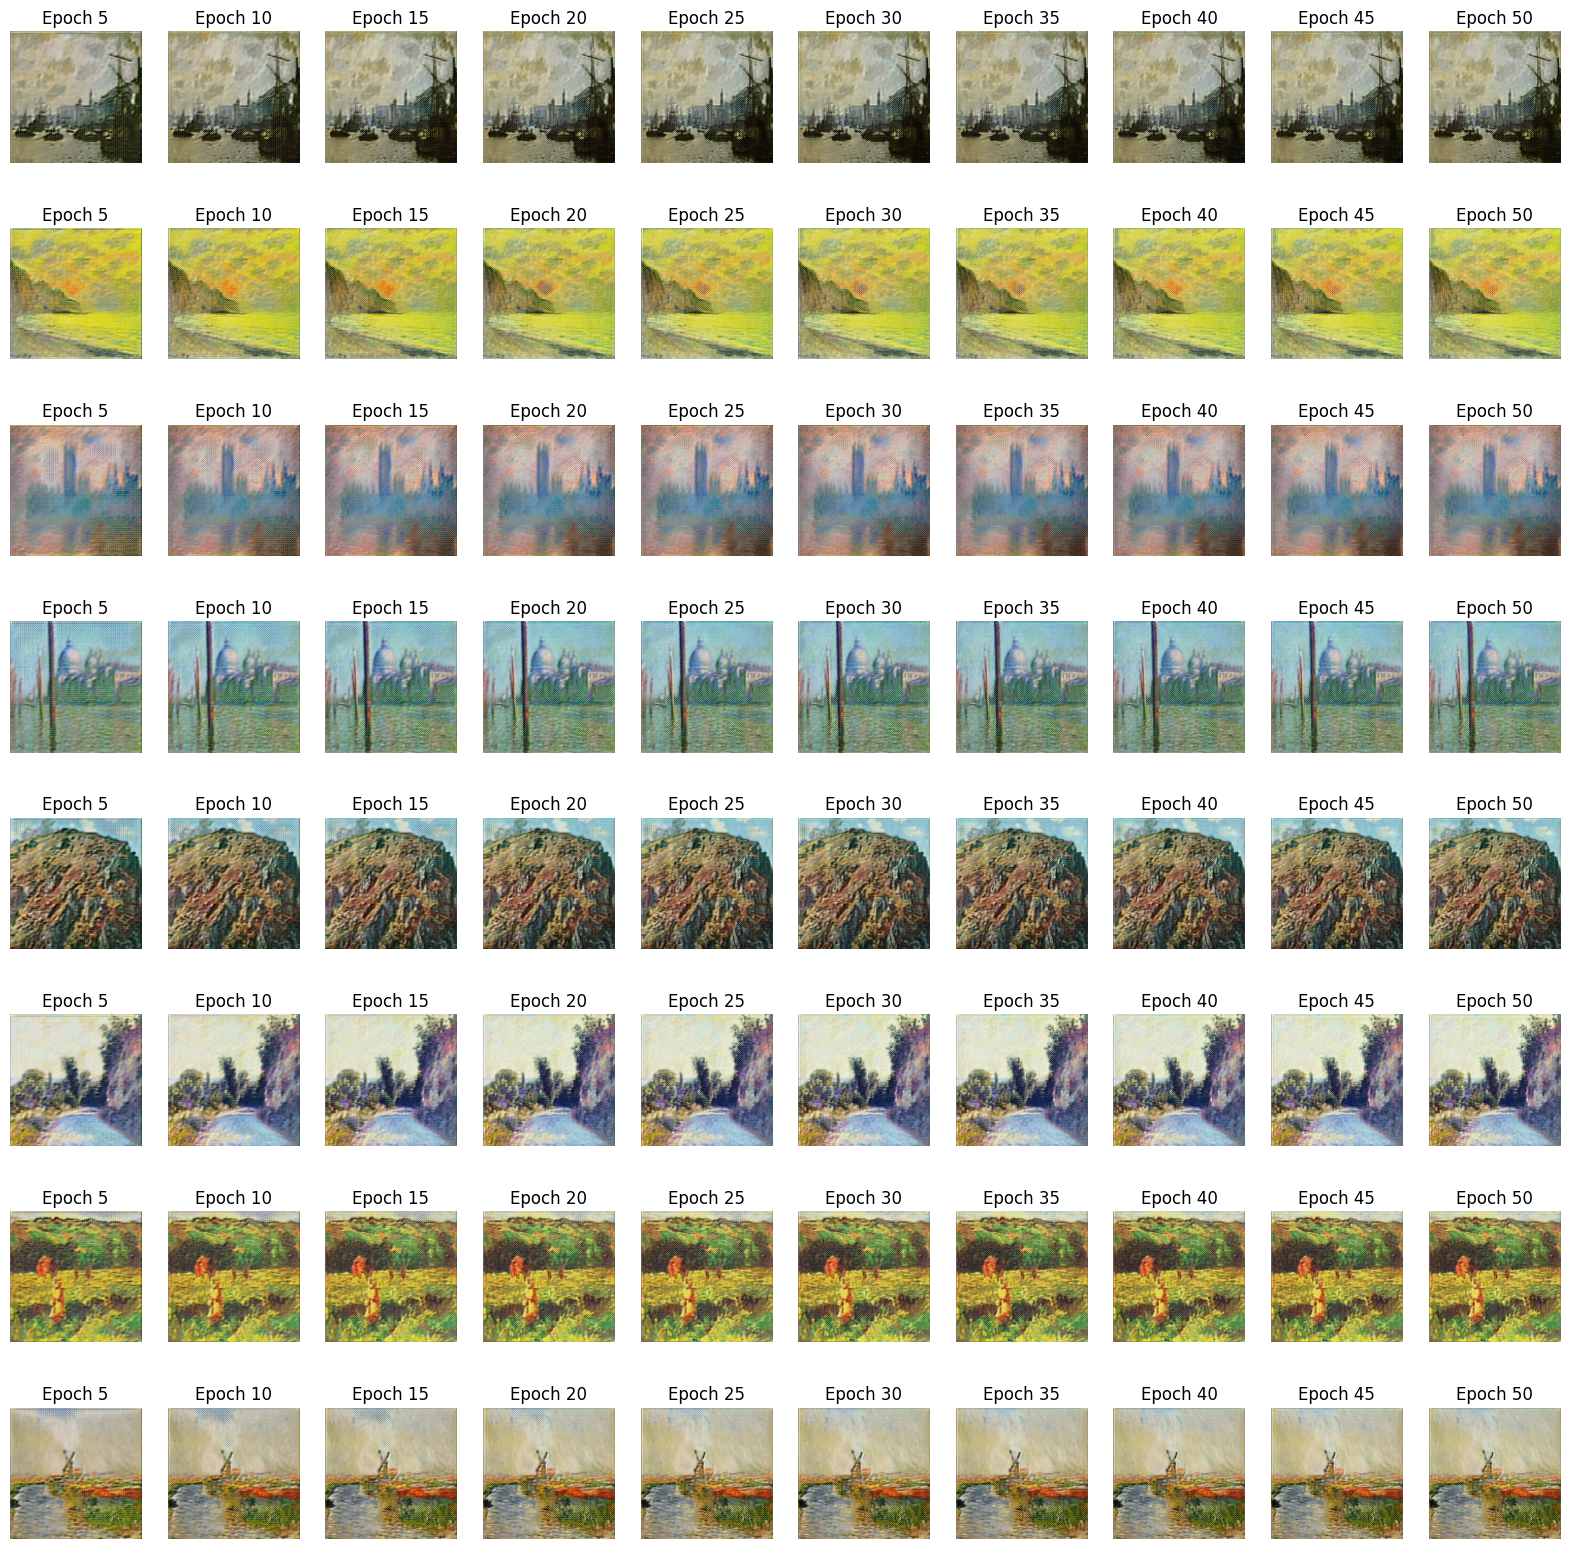

In [52]:
generated_img_dir = 'results'
# get all the images in the directory
generated_images_list = os.listdir(generated_img_dir)
generated_images_list = list(set([generated_images_list.split('_')[0] for generated_images_list in generated_images_list]))

# loop generated_images_list and display the images
# There is 8 distinct images(vertical) and 1,5,10,15,20,25,30,35,40,45,50 epochs(horizontal)
# Show 8 unique images for each epoch using matplotlib

fig, axs = plt.subplots(8, 10, figsize=(20, 20))
for i, img_name in enumerate(generated_images_list):
    for j in range(10):
        img = mpimg.imread(os.path.join(generated_img_dir, f'{img_name}_{j*5+4}.png'))
        axs[i, j].imshow(img)
        # set title epoch number
        axs[i, j].set_title(f'Epoch {j*5+5}')
        axs[i, j].axis('off') 

From epoch 10, the generated images start to look like Monet paintings

---
## 4. Conclusion

In this project, I tried to generate famous artist Monet's style images from the real photo images using the Gan model. 

I used the encoder to extract features from the Monet images, the generator to generate Monet-style images from the photo images, and the discriminator to classify the images as real or fake.

I think aritificial intelligence is a powerful tool that can be used to create art. and help artists to create new art styles.

But new discussions about copyright and the ethics are needed.

I enjoyed working on this project. Though I faced some challenges, I learned that the GAN model can crate Ukiyo-e style images.

Ukiyo-e is a genre of Japanese art that flourished in the Edo period.

I think it would be interesting to fusion the classical art of my country(Japan) and modern AI technology.

---
### Submisson

In [54]:
os.makedirs('kaggle/working/tmp', exist_ok=True)
# Code for generating Images 7000 at least 

generator = generater_model()
encoder = discriminator_maker()

encoder.load_weights('encoder.weights.h5')
generator.load_weights("gen.weights.h5")
feature_get = Model(inputs=encoder.input, outputs=encoder.get_layer(index=2).output)
feature_get1 = Model(inputs=encoder.input, outputs=encoder.get_layer(index=6).output)
i = 0
for batch in filtered_dataset:
        i += 1
        if i > 1000: 
            break
        monet , images = batch
        batch_m = monet
        # batch_m = tf.expand_dims(batch_m, axis=0)
        features = feature_get(batch_m, training= False)
        features1 = feature_get1(batch_m, training= False)
        img1 = images
        
        generated_images = generator([img1,features,features1 ], training=False)

        # Rescale images from [0, 1] to [0, 255]
        generated_images = generated_images * 255
        generated_images = tf.cast(generated_images, tf.uint8)  # Convert to uint8 for saving

        # Save images
        # print(generated_images.shape)
        gen = 0
        for gen_img in generated_images:
            gen += 1
            img = array_to_img(gen_img)
            img.save(os.path.join('tmp', f'generated_img_{i}_{gen}.jpg'))

        if i % 100 == 0:
            print(f"Images saved for batch {i}")

Images saved for batch 100
Images saved for batch 200
Images saved for batch 300
Images saved for batch 400
Images saved for batch 500
Images saved for batch 600
Images saved for batch 700
Images saved for batch 800
Images saved for batch 900
Images saved for batch 1000


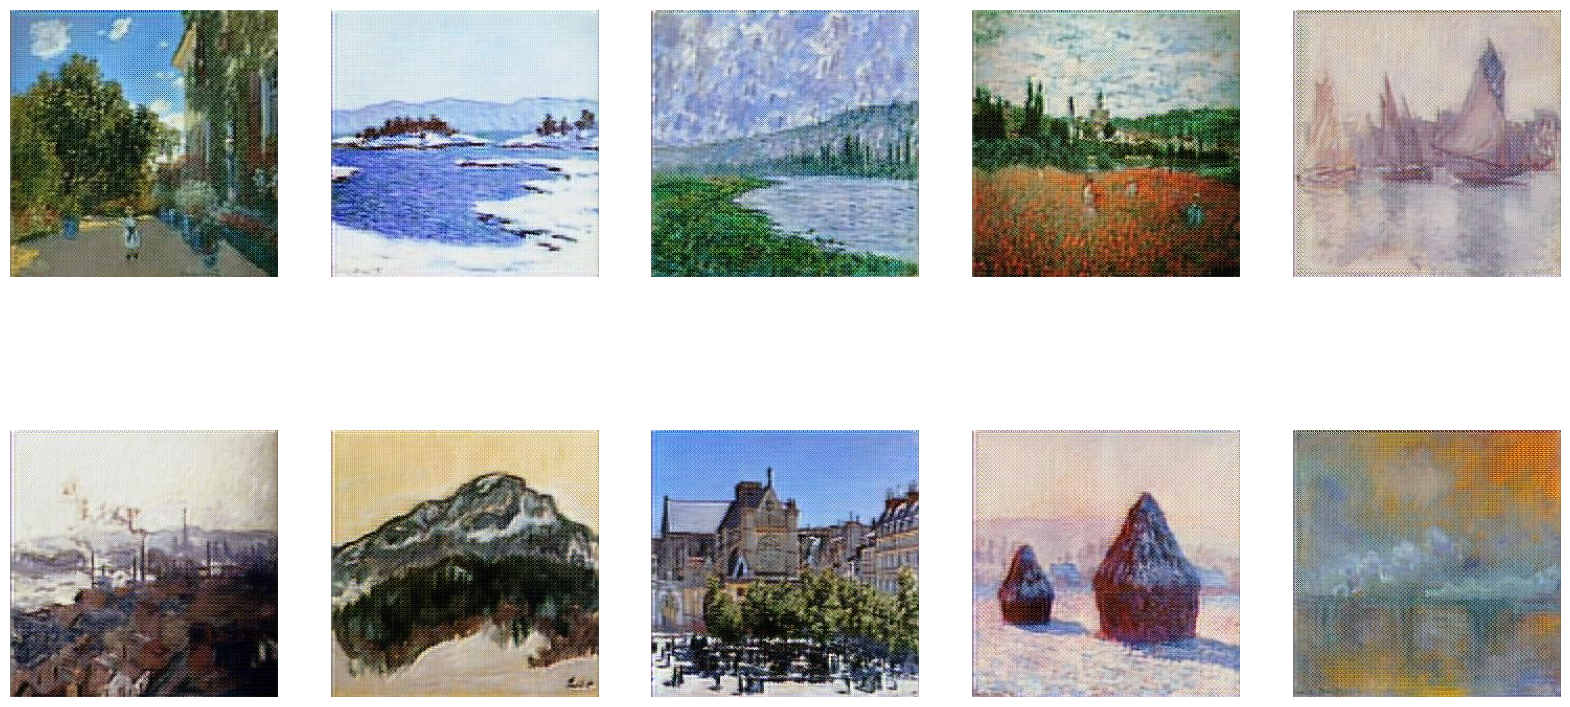

In [70]:
# show created 10 images randomly
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

random_indices = np.random.choice(1000, 10, replace=False)

for i, index in enumerate(random_indices):
    img = mpimg.imread(f'tmp/generated_img_{index+1}_1.jpg')
    axs[i//5, i%5].imshow(img)
    axs[i//5, i%5].axis('off')

In [56]:
import shutil
shutil.make_archive("/kaggle/working/images", 'zip', 'tmp')

'c:\\kaggle\\working\\images.zip'